# Game of Life !



In [2]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm, rc
#rc('animation', html='html5')



## Step 1: creating a random binary matrix

In [3]:
cells = np.random.randint(2, size = (6, 6))
cells

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 1]])

## Step 2: calculate neighbors

In [4]:
import numba


@numba.jit()
def brute_force_neighbors(cells):
    neighbors = np.zeros_like(cells) # Neighbors matrix
    nl, nr = cells.shape # Line and row count
    for l in range(nl):
        for r in range(nr):
            for ll in range( max(l-1,0) , min(l+2, nl)):
                for rr in range( max(r-1,0) , min(r+2, nr)):
                    neighbors[l,r] += cells[ll, rr]
                   
    neighbors -= cells
    return neighbors



cells = np.random.randint(2, size = (200, 200))
#%timeit brute_force_neighbors(cells)
#neighbors, counter = brute_force_neighbors(cells)
#counter
%timeit brute_force_neighbors(cells)

446 µs ± 6.94 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
cells = np.random.randint(2, size = (200, 200))
def numpy_neighbors(cells):
    neighbors = np.zeros_like(cells) # Neighbors matrix
    neighbors[  :  ,  :-1] += cells[  :  , 1:  ] # RIGHT
    neighbors[  :-1,  :-1] += cells[ 1:  , 1:  ] # LOWER RIGHT
    neighbors[  :-1,  :  ] += cells[ 1:  ,  :  ] # LOWER
    neighbors[  :-1, 1:  ] += cells[ 1:  ,  :-1] # LOWER LEFT
    neighbors[  :  , 1:  ] += cells[  :  ,  :-1] # LEFT
    neighbors[ 1:  , 1:  ] += cells[  :-1,  :-1] # UPPER LEFT
    neighbors[ 1:  ,  :  ] += cells[  :-1,  :  ] # UPPER 
    neighbors[ 1:  ,  :-1] += cells[  :-1, 1:  ] # UPPER RIGHT
    return neighbors

%timeit numpy_neighbors(cells)

360 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## A Game of Life class

In [6]:
class GOL:
    """
    A Game of Life class
    """
    def __init__(self, cells):
        self.cells = cells
    
    def neighbors(self):
        """
        Returns the neighbors of the cells.
        """
        return numpy_neighbors(self.cells)
    
    def play(self):
        """
        Play one round.
        """
        cells = self.cells
        n = self.neighbors()
        self.cells[:] = (((cells == 1) & np.isin(n, [1, 2,])) | # SURVIVAL !
                         ((cells == 0) & np.isin(n, [1,])))    # BIRTH !
        
    
    
cells = np.random.randint(2, size = (6, 6))
gol = GOL(cells)  
gol.play()
gol.cells

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0]])

## Animation


<IPython.core.display.Javascript object>


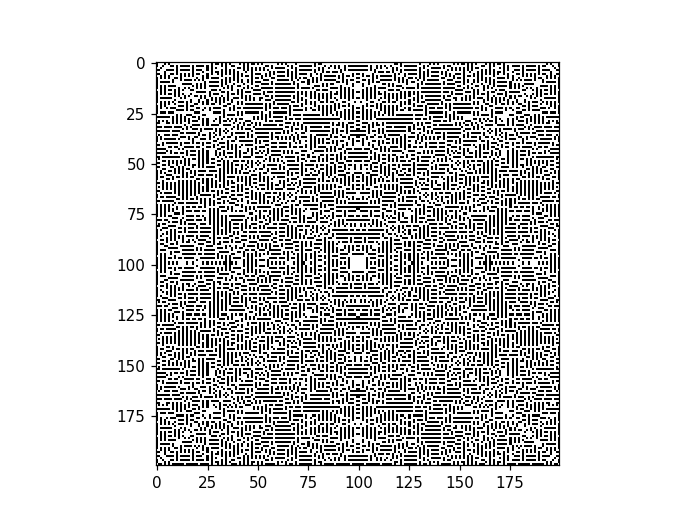

In [14]:

# ANIMATION
def updatefig(*args):
    gol.play()
    im.set_array(gol.cells)
    return im,

#cells = np.random.randint(2, size = (100, 100))
cells = np.zeros((200, 200))
cells[1:-1, 1:-1] = 1
gol = GOL(cells)  
fig, ax = plt.subplots()
#ax.axis('off')
im = plt.imshow(gol.cells, 
                interpolation = "nearest", 
                cmap = cm.binary, 
                animated = True)
anim = animation.FuncAnimation(fig, updatefig, frames=200, 
                               interval=50, blit=True)
plt.show()


In [8]:
a = 5,
a

(5,)

In [9]:
offset = np.arange(-1, 2)
Ol, Or = np.meshgrid(offset, offset)
Ol = Ol.flatten()
Or = Or.flatten()
o = np.array([Ol, Or]).T
o

array([[-1, -1],
       [ 0, -1],
       [ 1, -1],
       [-1,  0],
       [ 0,  0],
       [ 1,  0],
       [-1,  1],
       [ 0,  1],
       [ 1,  1]])

In [10]:
l, r = 2,0
coords = o + (l, r)
coords

array([[ 1, -1],
       [ 2, -1],
       [ 3, -1],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 1,  1],
       [ 2,  1],
       [ 3,  1]])

In [11]:

x, y = coords.T
coords[(x>=0)  & (y>=0) & (x< 3) & (y<3)]

array([[1, 0],
       [2, 0],
       [1, 1],
       [2, 1]])

In [12]:
a, b = 4., 5.
m = np.zeros(2)
m

array([ 0.,  0.])

In [13]:
m[:] = a, b
m

array([ 4.,  5.])

In [ ]:
np.array_equal(brute_force_neighbors(cells), numpy_neighbors(cells))

In [ ]:
l = 2 
r = 0
cells[l-1:l+2, r-1:r+2]

In [ ]:
np.zeros(np.array(cells.shape) + 2, dtype = np.uint8)

In [ ]:
cells[2:4, 3]

In [ ]:
cells[:, :-1:2]

In [ ]:
cells.shape

In [ ]:
for i in range(4):
    print(i)

In [ ]:
# Red
cells.reshape(3, 12)

In [ ]:
cells.flatten()

In [ ]:
a = np.random.rand(1000, 1000)
%timeit (a == a).sum() / a.size == 1

In [ ]:
a = np.random.rand(1000, 1000)
%timeit np.array_equal(a, a)

In [ ]:
# 
class Vector:
    """
    A vector class
    """
    def __init__(self, x = 0., y = 0., z = 0.):
        self.x = x
        self.y = y
        self.z = z
    
    def norm(self):
        return (self.x**2 + self.y**2 + self.z**2 )**.5
    
    def __repr__(self):
        return "<Vector ({0}, {1}, {2})>".format(self.x, 
                                                 self.y, self.z)
    
    def set_norm(self, n):
        n0 = self.norm()
        self.x *= n/n0
        self.y *= n/n0
        self.z *= n/n0
        
    n = property(norm, set_norm)
    
v = Vector(1, 2, 3)
v.norm()
    

In [ ]:
v.x = 4
v.n

In [ ]:
v.n = 1
v

In [ ]:
v.n